---
title: "Project Step II"
subtitle: "Group 11 - Exploratory Data Analysis"
date: 10/17/2023
date-modified: last-modified
date-format: long
format:
  html:
    theme: [cosmo, theme.scss]
    toc: true
    embed-resources: true
    number-sections: true
author:
  - name: Tegveer Ghura
    affiliations:
      - id: gu
        name: Georgetown University
        city: Washington
        state: DC
---

# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn.palettes import color_palette

# Load Cleaned Data

In [2]:
df = pd.read_csv('data/clean/deliveries_clean.csv')

In [3]:
df.head()

,season,match_type,venue,inning,batting_team,bowling_team,batsman,non_striker,bowler_type,ball,wickets,ball_length,cumulative_runs,event
0,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.1,0,full,1,Extras
1,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.2,0,good,1,Dot
2,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.3,0,Unknown,2,Extras
3,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.3,0,Unknown,2,Dot
4,2008,round-robin,Bangalore,1,Kolkata Knight Riders,Royal Challengers Bangalore,top,top,pacer,0.4,0,good,2,Dot


## Tournament-Level Plots

### Total Runs Scored

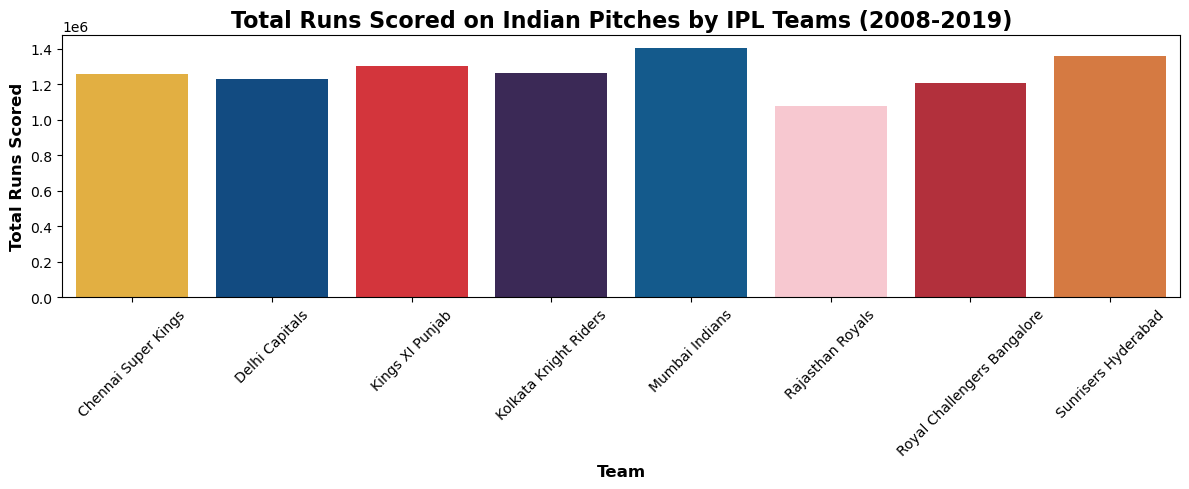

In [43]:
team_colors = {
    'Chennai Super Kings': '#fdb927',  # Yellow for CSK
    'Delhi Capitals': '#004c93',  # Blue for DD
    'Kings XI Punjab': '#ed1b24',  # Red for KXIP
    'Kolkata Knight Riders': '#3A225D',  # Purple for KKR
    'Mumbai Indians': '#005da0',  # Blue for Mumbai Indians
    'Rajasthan Royals': 'pink',  # Pink for RR
    'Royal Challengers Bangalore': '#c81a2b',  # Red for RCB
    'Sunrisers Hyderabad': '#EE7429'  # Orange for SRH
}

# Calculate total runs scored by each team
total_runs_by_team = df.groupby('batting_team')['cumulative_runs'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 5))
sns.barplot(x='batting_team', y='cumulative_runs', data=total_runs_by_team, palette=[team_colors[team] for team in sorted(df.batting_team.unique())])
plt.xlabel('Team', fontsize=12, fontweight='bold')
plt.ylabel('Total Runs Scored', fontsize=12, fontweight='bold')
plt.title('Total Runs Scored on Indian Pitches by IPL Teams (2008-2019)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig('products/plots/eda_total_runs_by_team.jpeg', dpi=300)
plt.show()

### Total Wickets Taken

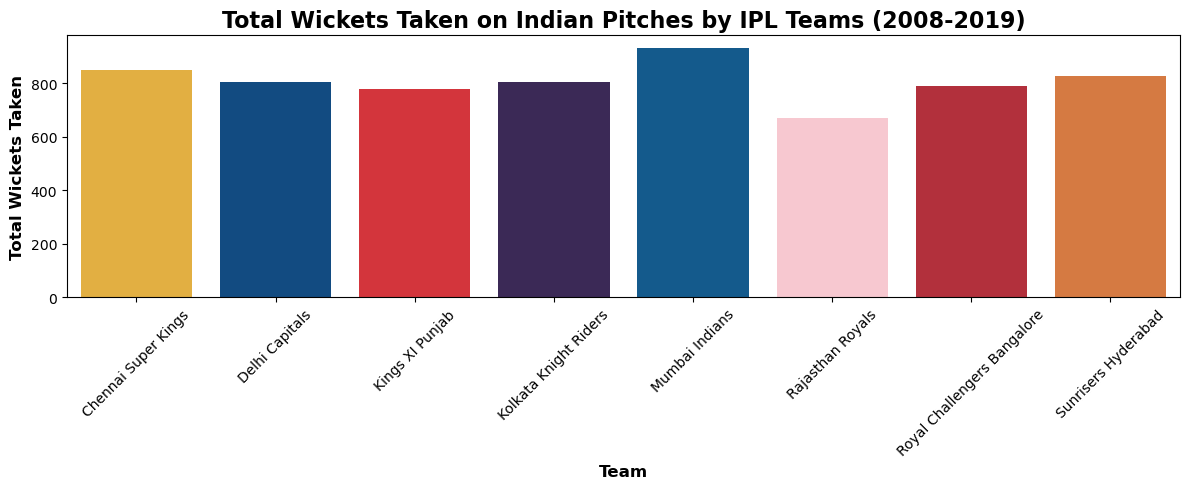

In [44]:
# Filter rows where the event is 'Wickets'
wickets_data = df[df['event'] == 'WICKET!']

# Group data by 'bowling_team' and count occurrences of 'Wickets' event
wickets_by_team = wickets_data.groupby('bowling_team')['event'].count().reset_index()

# Rename the columns for clarity
wickets_by_team.columns = ['Team', 'Wickets']

# Create a bar plot for total number of wickets taken by each team
plt.figure(figsize=(12, 5))
sns.barplot(x='Team', y='Wickets', data=wickets_by_team, palette=[team_colors[team] for team in sorted(df.bowling_team.unique())])
plt.xlabel('Team', fontsize=12, fontweight='bold')
plt.ylabel('Total Wickets Taken', fontsize=12, fontweight='bold')
plt.title('Total Wickets Taken on Indian Pitches by IPL Teams (2008-2019)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
# Adjust the layout to prevent cutoff of labels
plt.tight_layout()
plt.savefig('products/plots/eda_total_wickets_by_team.jpeg', dpi=300)
plt.show()